# # Pandas Nedir


Veri Analizi İçin Pandas Kütüphanesi

In [1]:
import pandas as pd

 Pandasda iki veri yapısı vardır. Series ve DataFrame veri yapısı. Series bir sütundan oluşurken, DataFrame satır ve sütunlardan oluşur.

## Series Veri Yapısı 

In [2]:
obje= pd.Series(["Merhaba", "Ben","Pandas","Öğreniyorum"])
obje

0        Merhaba
1            Ben
2         Pandas
3    Öğreniyorum
dtype: object

İndex kullanarak istediğimiz elemanı ekrana bastırabiliriz.

In [3]:
obje[0]

'Merhaba'

İndexleri değiştirmek de mümkün. Örneğin;

In [4]:
obje=pd.Series(["Merhaba","Ben","Pandas","Öğreniyorum"], index=["a","b","c","d"])
obje

a        Merhaba
b            Ben
c         Pandas
d    Öğreniyorum
dtype: object

In [5]:
obje["b"]

'Ben'

Objenin İndex yapısını görmek istersek 

In [6]:
obje.index

Index(['a', 'b', 'c', 'd'], dtype='object')

Pythonda bulunan Sözlük, Tupple gibi veri tiplerini Series Veri yapısına çevirebiliriz.


In [11]:
obje2= {"John":90,"Sally":85,"Jim":45,"Luna":98}
nt=pd.Series(obje2)
nt

John     90
Sally    85
Jim      45
Luna     98
dtype: int64

In [12]:
nt["John"]

90

Filtreleme yaparak değerleri görmek mümkündür.

In [13]:
nt[nt>85]

John    90
Luna    98
dtype: int64

Boolean Tipi işlemleri Series Veri Yapısı üzerinde kullanmak için

In [19]:
nt<85

John      True
Sally    False
Jim       True
Luna     False
dtype: bool

Değerleri değiştirmek istersek

In [20]:
nt["John"]=30


In [21]:
nt

John     30
Sally    85
Jim      50
Luna     98
dtype: int64

Belirli bir filtreleme yapıldıktan sonra değer değiştirmek.

In [22]:
nt[nt<80]=50

In [23]:
nt

John     50
Sally    85
Jim      50
Luna     98
dtype: int64

Herhangi bir değerin varlığını kontrol etmek

In [24]:
"John" in nt

True

In [26]:
"Wendsday" in nt

False

Series veri tipinde matematiklsel işlemler yapmak istersek

In [27]:
nt/10

John     5.0
Sally    8.5
Jim      5.0
Luna     9.8
dtype: float64

Eksik veri kontrolü yapmak istersek

In [28]:
nt.isnull()

John     False
Sally    False
Jim      False
Luna     False
dtype: bool

# Series İle Çalışmak 

Veriseti okutmak

In [29]:
games= pd.read_csv("vgsalesGlobale.csv")

İlk beş satırı görmek için head() methodu kullanılır.

In [30]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Games adlı veritipindeki değişlenleri görebilmek için dtypes kullanırız.

In [31]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Yalnızca Series veritipinde kullanılan descripe methodu yardımıyla bir sütundaki tanımsal değerleri görebiliriz.

In [33]:
games.Genre.describe()

count      16598
unique        12
top       Action
freq        3316
Name: Genre, dtype: object

Değişken içindeki değerleri görmek için


In [35]:
games.Genre.value_counts()                    

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

Her bir değerin yüzdesini görmek için(Tüm veri seti içinde) normalize=True 

In [36]:
games.Genre.value_counts(normalize=True)                    

Action          0.199783
Sports          0.141342
Misc            0.104772
Role-Playing    0.089649
Shooter         0.078925
Adventure       0.077479
Racing          0.075250
Platform        0.053380
Simulation      0.052235
Fighting        0.051090
Strategy        0.041029
Puzzle          0.035064
Name: Genre, dtype: float64

Veri tipini görmek için type methodunu kullabiliriz.

In [38]:
type(games.Genre.value_counts())

pandas.core.series.Series

Veri tipimizin Series olduğunu gördüğümüze göre Series için geçerli olan her özellik Genre sütunu için geçerli olacaktır.

In [41]:
games.Genre.value_counts().head()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Name: Genre, dtype: int64

Tekrar eden verileri tek olarak görmek için uniqe methodu kullanılır.

In [42]:
games.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Unique methodu ile kaç farklı tür olduğunu görebilidğimiz gibi Nunique methodu ile tür sayısını görebiliriz.

In [43]:
games.Genre.nunique()

12

İki değişkenin karşılıklı değerleri tablo olarak görmek istersek CrossTab Methodunu kullanabiliriz. Buradaki tablo bize türlerin yıllara göre sayıları karşımıza gelecektir.

In [45]:
pd.crosstab(games.Genre,games.Year)

Year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2020.0
Genre,,,,,,,,,,,,,,,,,,,,,
Action,1,25,18,7,1,2,6,2,2,2,...,272,226,239,266,148,186,255,119,1,0
Adventure,0,0,0,1,0,0,0,1,0,0,...,141,154,108,58,60,75,54,34,0,0
Fighting,1,0,0,0,0,1,0,2,0,0,...,53,40,50,29,20,23,21,14,0,0
Misc,4,0,1,1,1,0,0,0,0,1,...,207,201,184,38,42,41,39,18,0,0
Platform,0,3,5,5,1,4,6,2,4,3,...,29,31,37,12,37,10,14,10,0,0
Puzzle,0,2,3,1,3,4,0,0,1,5,...,79,45,43,11,3,8,6,0,0,0
Racing,0,1,2,0,3,0,1,0,1,0,...,84,57,65,30,16,27,19,20,0,0
Role-Playing,0,0,0,0,0,0,1,3,3,2,...,103,103,95,78,71,91,78,40,2,0
Shooter,2,10,5,1,3,1,4,2,1,1,...,91,81,94,48,59,47,34,32,0,0


Sayısal bir veri türü olan Global_Sales sütununu ele alalım. Burada tanımsal ifadelere bakmak istersek describe methodunu kullanırız.

In [46]:
games.Global_Sales.describe()

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64

Bu sayısal verinin direkt ortalamasını almak istersek mean methodunu kullanabiliriz.

In [47]:
games.Global_Sales.mean()

0.53744065550074

Eğer bu verinin değerlerinin hesaplamalarını görmek istersek

In [49]:
games.Global_Sales.value_counts()

0.02    1071
0.03     811
0.04     645
0.05     632
0.01     618
        ... 
5.01       1
5.05       1
5.07       1
5.11       1
3.16       1
Name: Global_Sales, Length: 623, dtype: int64

Şimdi Series Veri tipindeki veriyi nasıl grafik içinde göreceğimize bakalım. Öncelikle %matplotlib inline komutunu yazarız.Oyunların yıllara göre histogram grafiğini çizdirmeyi deneyelim.

In [52]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

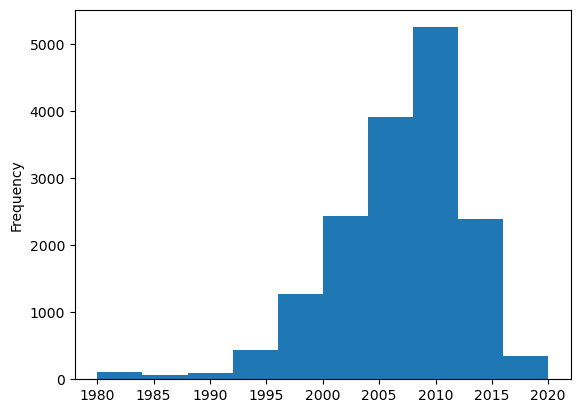

In [53]:
games.Year.plot(kind="hist")

In [54]:
games.Genre.value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

<AxesSubplot:>

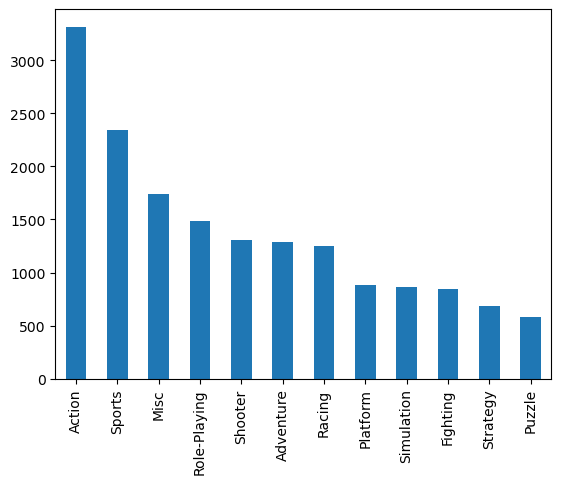

In [55]:
games.Genre.value_counts().plot(kind="bar")